In [1]:
import math
import random
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import scipy

import warnings 
warnings.filterwarnings('ignore')

## Normal Random Variable

In [2]:
'''정규분포 cdf의 역함수'''
def inv_normal_df(u):
    return stats.norm.ppf(u)

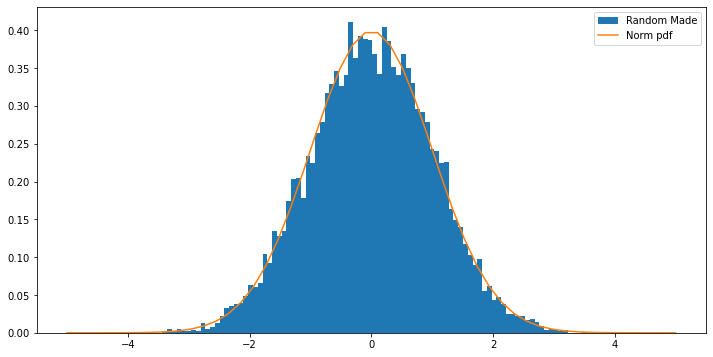

In [3]:
'''Uniform 분포 값 발생'''
random_num = [random.random() for x in range (10000)]

inv_normal_df_list = [inv_normal_df(u) for u in random_num]

histogram = np.histogram(inv_normal_df_list)
histogram_distribution = stats.rv_histogram(histogram)

x = np.linspace(-5, 5)
y = stats.norm.pdf(x)

plt.figure(figsize=(12,6))
plt.hist(inv_normal_df_list, density=True, bins=100, label='Random Made')
plt.plot(x, y, label='Norm pdf')
plt.legend()
plt.show()

## Exponential Random Variable

In [4]:
def inv_exponential_df(u, theta):
    return -np.log(1-u)/theta

def expon_pdf(u, theta):
    return theta * np.exp(-theta*u)

def expon_cdf(u, theta):
    return 1 - np.exp(-theta*u)

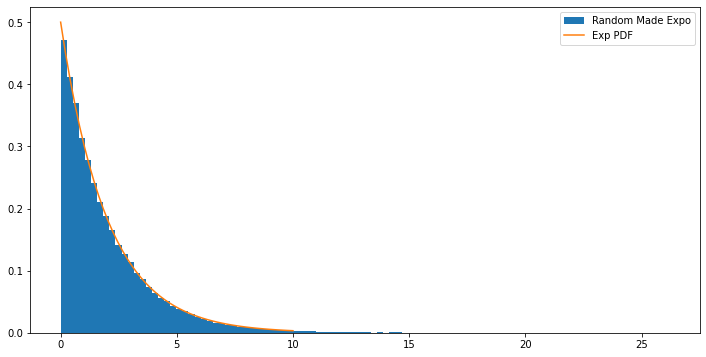

In [5]:
theta = 0.5

random_num = [random.random() for x in range (100000)]
inv_exp_list = [inv_exponential_df(x, theta) for x in random_num]

histogram = np.histogram(inv_exp_list)
histogram_distribution = stats.rv_histogram(histogram)

x = np.linspace(0, 10)
y = expon_pdf(x, theta)

plt.figure(figsize=(12,6))
plt.hist(inv_exp_list, bins=100, density=True, label='Random Made Expo')
plt.plot(x, y, label='Exp PDF')
plt.legend()
plt.show()

## Acceptance-Rejection Method

$$ f(x) \leq cg(x) $$

1. Generate $X$ from $g$
2. Generate $U$
3. Accept $X$ if $U \leq f(X)/cg(X)$

$$P(Y \in A) = \int_{A}^{} f(x)\, dx$$

In [6]:
def beta_func (u):
    if type(u) == list:

        def eq (u):
            return u**(3-1)*(1-u)**(2-1)

        value_list = []
        for i in u:
            beta = scipy.integrate.quad(lambda i: eq(i), 0, 1)[0]
            a = eq(i)
            value = 1/beta * a
            value_list.append(value)
        return value_list

    else:

        def eq (u):
            return u**(3-1)*(1-u)**(2-1)
            
        beta = scipy.integrate.quad(lambda u: eq(u), 0, 1)[0]
        a = eq(u)

        return 1/beta * a



In [7]:
c = beta_func(2/3)
c

1.7777777777777781

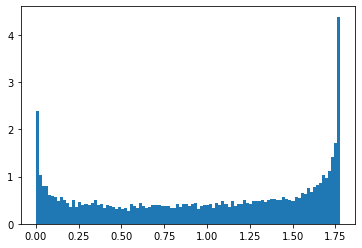

In [8]:
random_num = [random.random() for x in range (10000)]
beta_list = [beta_func(u) for u in random_num]

plt.hist(beta_list, density=True, bins=100, label='Random Made')
plt.show()

In [9]:
c = beta_func(2/3)
c

1.7777777777777781

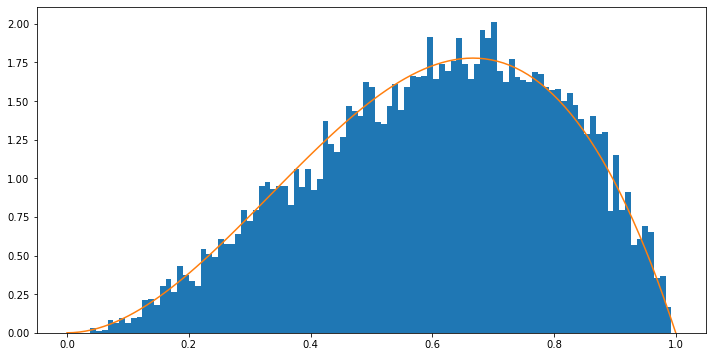

In [10]:
u1 = [random.random() for x in range(10000)]
u2 = [random.random() for x in range(10000)]



u2_list = []
while True:
    if len(u2_list) == 10000:
        break
    else:
        u1 = random.random()
        u2 = random.random()
        if c * u2 <= beta_func(u1):
            u2_list.append(u1)


plt.figure(figsize=(12,6))
plt.hist(u2_list, bins=100, density=True)
plt.plot(np.linspace(0,1,100), [beta_func(x) for x in np.linspace(0,1,100)])
plt.show()

## Box-Muller Method

In [11]:
def R (u):
    return -2 * np.log(u)

def V (u):
    return 2 * np.pi * u

def Z1 (R, V):
    return R ** (1/2) * np.cos(V)

def Z2 (R, V):
    return R ** (1/2) * np.sin(V)

def z1_for_circle (V):
    return np.cos(V)

def z2_for_circle (V):
    return np.sin(V)

<AxesSubplot:>

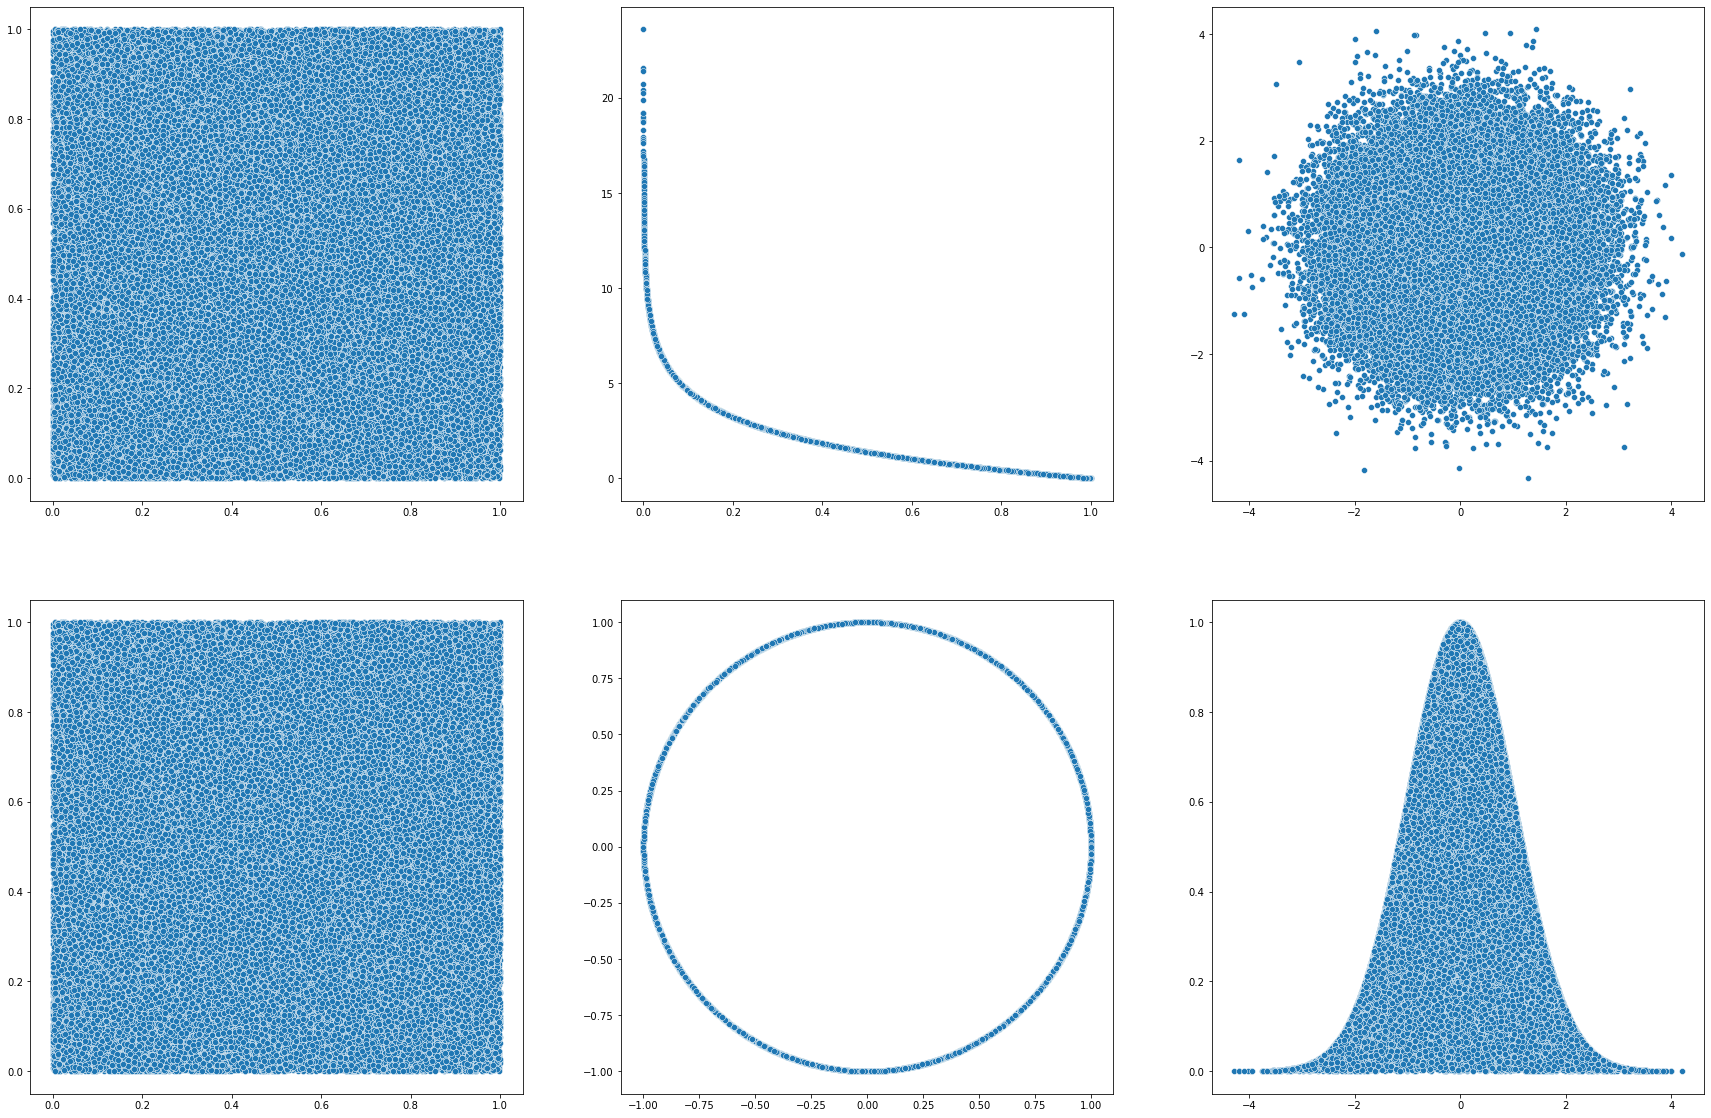

In [12]:
z1_list = []
z2_list = []
u1_list = []
u2_list = []
r_list = []
v_list = []
z1_for_circle_list = []
z2_for_circle_list = []

while True:

    if len(z1_list) != 100000:

        u1 = random.random()
        u2 = random.random()
        
        u1_list.append(u1)
        u2_list.append(u2)
        
        v = V(u2)
        r = R(u1)

        r_list.append(r)
        v_list.append(v)

        z1_list.append(Z1(r, v))
        z2_list.append(Z2(r, v))

        z1_for_circle_list.append(z1_for_circle(v))
        z2_for_circle_list.append(z2_for_circle(v))

    else:
        break


fig, ax = plt.subplots(2, 3, figsize=(30,20), facecolor='w')

sns.scatterplot(u1_list, u2_list, ax=ax[0,0])
sns.scatterplot(u1_list, r_list, ax=ax[0,1])
sns.scatterplot(z1_list, z2_list, ax=ax[0,2])
sns.scatterplot(u1_list, u2_list, ax=ax[1,0])
sns.scatterplot(z1_for_circle_list, z2_for_circle_list, ax=ax[1,1])
sns.scatterplot(z1_list, u1_list, ax=ax[1,2])



## Multivariate Normal

For vector $ X = (X_1, \cdots , X_n) $ has a multivariate normal (or Gaussian) distribution if linear combination <br>

$$ \sum_{i=1}^{n} a_i X_i, \qquad for \,\, a_i \in \R$$ 

is normally distributed

The multivariate normal distribution has a joint probability density given by

$$ p(x \vert m, K_0) = (2 \pi)^{-d/2} |K_0|^{-1/2} \exp{-\frac{1}{2}(x-m)^T K_0^{-1}(x-m)}$$

where, $m^d$ is the *mean vector* and $K_0 M_d()$ is the *(symmetric, postive definite) covariance matrix*

In [23]:
dimension = 2

mean_vector = np.array([1,2]).reshape(2,1)
covariance_matrix = np.array([[2,1],
                              [1,2]])

Compute Eigenvalues of **Covariance Matrix**

In [24]:
np.linalg.eigvals(covariance_matrix)

array([3., 1.])

위를 통해 Covariance Matrix가 양의 정부호를 가지는 것을 확인할 수 있음.

양의 정부호를 가지고 있다면, $ a > 0, \, ac > b^2 \,\,\, >> \,\,\, f(x,\,y)\,=\,ax^2\,+\,2bxy\,+\,cy^2 $

이것이 극소, 극대, 안장점 관련된 정의에서 극소로 연결되는 것 같음

eigenvalue 값들이 양수 이므로, cov 행렬은 양의 정부호이다.

1. 춀레스키 분해 계산하기

In [28]:
epsilon = 10e-5

K = covariance_matrix + epsilon * np.identity(dimension)

L = np.linalg.cholesky(K)
L

array([[1.41424892, 0.        ],
       [0.7070891 , 1.2247959 ]])

In [30]:
K

array([[2.0001, 1.    ],
       [1.    , 2.0001]])

In [29]:
np.dot(L, np.transpose(L))

array([[2.0001, 1.    ],
       [1.    , 2.0001]])

2. Generate Independent Sample $u \sim N(0,I)$

In [37]:
n = 10000

u = np.random.normal(loc=0, scale=1, size=dimension*n).reshape(dimension, n)

3. Compute $ x = m + Lu $

Variable $x = m + Lu$ has a multivariate normal distribution since is a linear combination of *independent* normally distributed variables. Moreover,

$$E[x] = E[m+Lu] = m + LE[u] = m$$

and 

$$E[xx^T] = E[mm^T] + E[mu^T L^T] + E[Lum^T] + E[Luu^T L^T] = ||m^2|| + LE[uu^T]L^T$$

In [46]:
x = mean_vector + L @ u

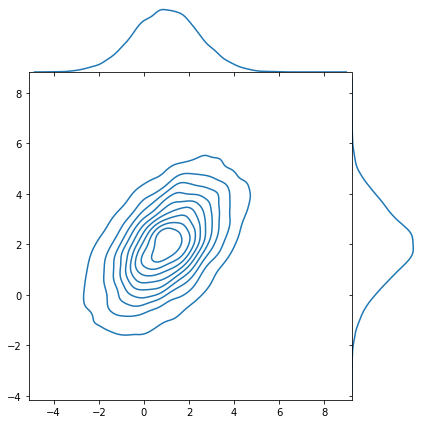

In [47]:
sns.jointplot(x=x[0], y=x[1], kind='kde', space=0)

위 과정을 넘파이로 하면

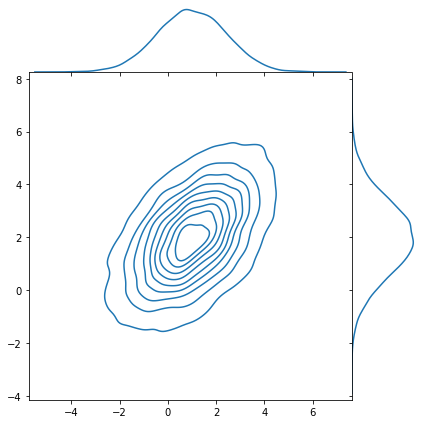

In [50]:
z = np.random.multivariate_normal(mean=mean_vector.reshape(dimension,), cov=K, size=n)
y = np.transpose(z)

sns.jointplot(x=y[0], y=y[1], kind='kde', space=0)

4. Sums of Normal Random Variables need not be Normal

Note that sums of normal random variables need not be normal. <br>

Let $Z_1 N(0,1)$ and $Z_2 := (Z_1)Z_1$ <br>

$Z_1 + Z_2$ is normally distributed

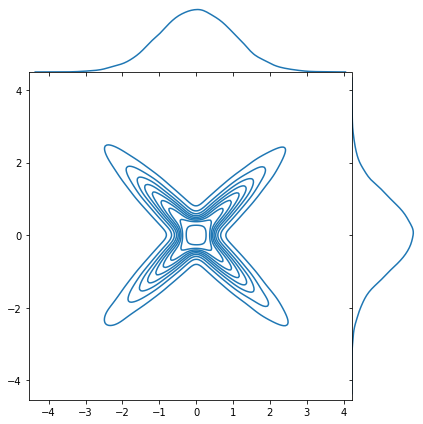

In [51]:
z_1 = np.random.normal(loc=0, scale=1, size=n)
z = np.random.normal(loc=0, scale= 1, size=n)

z_2 = np.sign(z)*z_1

sns.jointplot(x=z_1, y=z_2, kind='kde', space=0)

In [13]:
import yfinance as yf

In [14]:
df = yf.download(['TSLA', 'AAPL'], progress=False)['Close'].rename(columns={'^GSPC':'S&P500', '^KS11':'KOSPI'}).resample('m').last().pct_change().dropna()['2001-01-01':]
df.head()

,AAPL,TSLA
Date,,
2010-07-31,0.022741,-0.163240
2010-08-31,-0.055005,-0.023069
2010-09-30,0.167215,0.047741
2010-10-31,0.060722,0.070063
2010-11-30,0.033790,0.617674


In [58]:
dimension = len(df.mean())
dimension

2

In [53]:
df_mean = np.asarray(df.mean())
df_mean

array([0.02260495, 0.04960906])

In [54]:
df_cov = np.asarray(df.cov())
df_cov

array([[0.00613707, 0.00489272],
       [0.00489272, 0.03318003]])

In [55]:
df_eig = np.linalg.eigvals(df.cov())
df_eig

array([0.00527908, 0.03403803])

In [59]:
epsilon = 10e-5

K = covariance_matrix + epsilon * np.identity(dimension)

L = np.linalg.cholesky(K)
L

array([[1.41424892, 0.        ],
       [0.7070891 , 1.2247959 ]])

In [60]:
n = 10000

u = np.random.normal(loc=0, scale=1, size=dimension*n).reshape(dimension, n)

In [61]:
x = mean_vector + L @ u

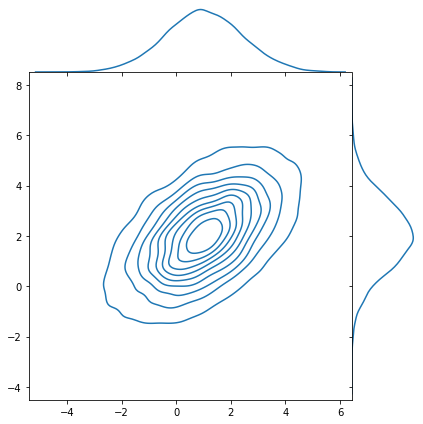

In [62]:
sns.jointplot(x=x[0], y=x[1], kind='kde', space=0)

위를 보면 정규분포라고 보기엔 미묘한 차이가 있음

In [17]:
x_min, x_max = df['AAPL'].min(), df['AAPL'].max()
y_min, y_max = df['TSLA'].min(), df['TSLA'].max()
x, y = np.mgrid[x_min:x_max:0.1, y_min:y_max:0.1]
pos = np.dstack((x,y))

[AAPL] x_min: -0.184 	x_max:0.214 
[TSLA] y_min: -0.246 	y_max:0.811 
mean: [0.02260495 0.04960906]


Text(0.5, 0, 'PDF')

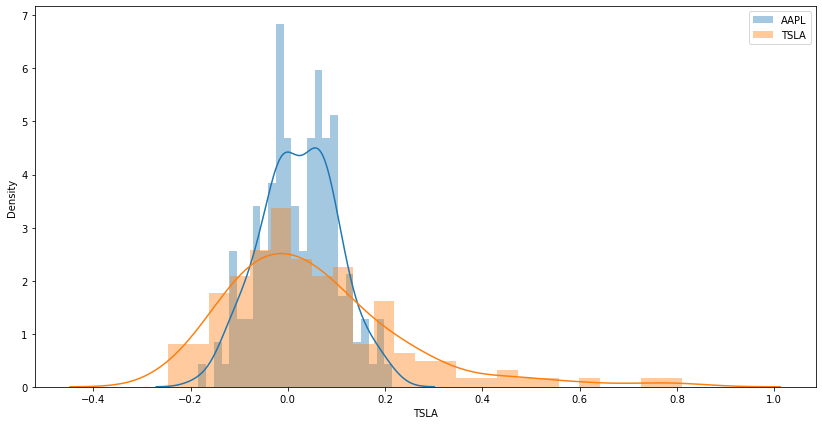

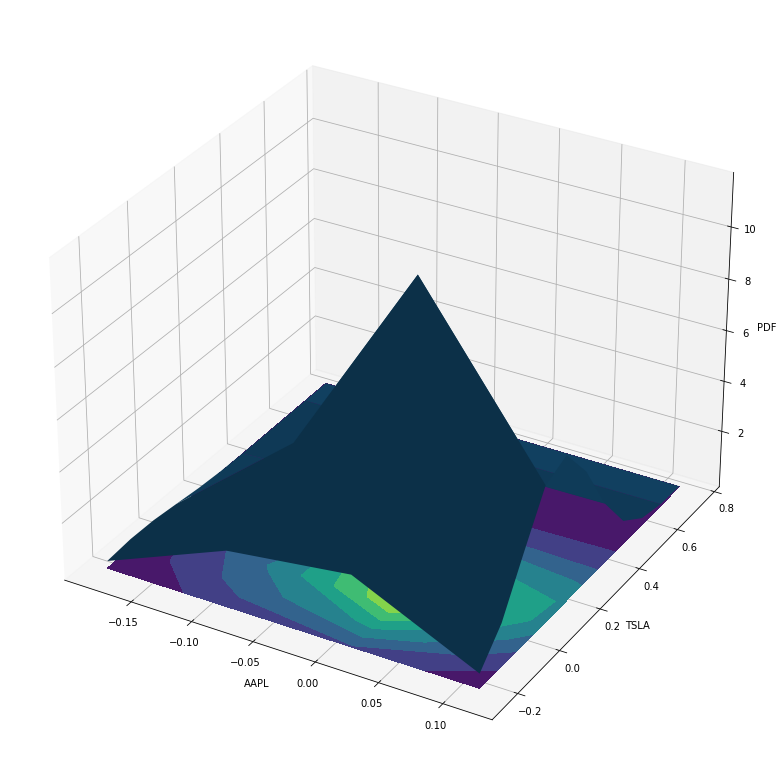

In [18]:
z = stats.multivariate_normal.pdf(pos, mean=np.asarray(df.mean()), cov=np.asarray(df.cov()))

# Visualization
print(f'[AAPL] x_min: {x_min:<6.3} \tx_max:{x_max:<6.3}')
print(f'[TSLA] y_min: {y_min:<6.3} \ty_max:{y_max:<6.3}')
print('mean:', np.asarray(df.mean()))

# First Plot
fig = plt.figure(figsize=(14,7), facecolor='w')
sns.distplot(df['AAPL'], bins=25, label='AAPL')
sns.distplot(df['TSLA'], bins=25, label='TSLA')
plt.legend()

# Second 3d Plot
fig = plt.figure(figsize=(14,14), facecolor='w')
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, rstride=3, cstride=3, linewidth=1, antialiased=True)
ax.contourf(x, y, z, zdir='z', offset=-0.01)

# Adjust the limits, ticks and view angle
#ax.set_zlim(-0.01,0.02)
#ax.view_init(27, -21)
ax.set_xlabel('AAPL')
ax.set_ylabel('TSLA')
ax.set_zlabel('PDF')